##  Tabular DataSet 
Practical 1 

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt   
from sklearn.metrics import mean_absolute_error   
from sklearn.model_selection import train_test_split   

In [264]:
data = pd.read_csv('fars.csv')
print(data.shape)
list(data)

(100968, 30)


['CASE_STATE',
 'AGE',
 'SEX',
 'PERSON_TYPE',
 'SEATING_POSITION',
 'RESTRAINT_SYSTEM-USE',
 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
 'EJECTION',
 'EJECTION_PATH',
 'EXTRICATION',
 'NON_MOTORIST_LOCATION',
 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'METHOD_ALCOHOL_DETERMINATION',
 'ALCOHOL_TEST_TYPE',
 'ALCOHOL_TEST_RESULT',
 'POLICE-REPORTED_DRUG_INVOLVEMENT',
 'METHOD_OF_DRUG_DETERMINATION',
 'DRUG_TEST_TYPE_(1_of_3)',
 'DRUG_TEST_RESULTS_(1_of_3)',
 'DRUG_TEST_TYPE_(2_of_3)',
 'DRUG_TEST_RESULTS_(2_of_3)',
 'DRUG_TEST_TYPE_(3_of_3)',
 'DRUG_TEST_RESULTS_(3_of_3)',
 'HISPANIC_ORIGIN',
 'TAKEN_TO_HOSPITAL',
 'RELATED_FACTOR_(1)-PERSON_LEVEL',
 'RELATED_FACTOR_(2)-PERSON_LEVEL',
 'RELATED_FACTOR_(3)-PERSON_LEVEL',
 'RACE',
 'INJURY_SEVERITY']

In [228]:
import sweetviz as sv

# report = sv.analyze(data)
# report.show_html('sweetviz_report.html')

In [265]:
data.head(5)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


In [230]:
# for df in [data]:
#     df['Sex_binary']=df['SEX'].map({'Male':1,'Female':0})
#     df['INJURY_SEVERITY']=df['INJURY_SEVERITY'].map({'Possible_Injury': 0,'No_Injury': 1,'Incapaciting_Injury': 6,'Fatal_Injury': 3,'Unknown': 4,'Nonincapaciting_Evident_Injury': 5,'Died_Prior_to_Accident': 2,'Injured_Severity_Unknown': 7})


In [266]:

features = ['CASE_STATE',
 'AGE',
 'SEX',
 'PERSON_TYPE',
 'SEATING_POSITION',
 'RESTRAINT_SYSTEM-USE',
 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
 'EJECTION',
 'EJECTION_PATH',
 'EXTRICATION',
 'NON_MOTORIST_LOCATION',
 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'METHOD_ALCOHOL_DETERMINATION',
 'ALCOHOL_TEST_TYPE',
 'ALCOHOL_TEST_RESULT',
 'POLICE-REPORTED_DRUG_INVOLVEMENT',
 'METHOD_OF_DRUG_DETERMINATION',
 'DRUG_TEST_TYPE_(1_of_3)',
 'DRUG_TEST_RESULTS_(1_of_3)',
 'DRUG_TEST_TYPE_(2_of_3)',
 'DRUG_TEST_RESULTS_(2_of_3)',
 'DRUG_TEST_TYPE_(3_of_3)',
 'DRUG_TEST_RESULTS_(3_of_3)',
 'HISPANIC_ORIGIN',
 'TAKEN_TO_HOSPITAL',
 'RELATED_FACTOR_(1)-PERSON_LEVEL',
 'RELATED_FACTOR_(2)-PERSON_LEVEL',
 'RELATED_FACTOR_(3)-PERSON_LEVEL',
 'RACE']

In [267]:
data.replace('Unknown', pd.NA, inplace=True)
data = data.dropna()
data.shape

(66869, 30)

In [268]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in ['CASE_STATE',
 'AGE',
 'SEX',
 'PERSON_TYPE',
 'SEATING_POSITION',
 'RESTRAINT_SYSTEM-USE',
 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
 'EJECTION',
 'EJECTION_PATH',
 'EXTRICATION',
 'NON_MOTORIST_LOCATION',
 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'METHOD_ALCOHOL_DETERMINATION',
 'ALCOHOL_TEST_TYPE',
 'ALCOHOL_TEST_RESULT',
 'POLICE-REPORTED_DRUG_INVOLVEMENT',
 'METHOD_OF_DRUG_DETERMINATION',
 'DRUG_TEST_TYPE_(1_of_3)',
 'DRUG_TEST_RESULTS_(1_of_3)',
 'DRUG_TEST_TYPE_(2_of_3)',
 'DRUG_TEST_RESULTS_(2_of_3)',
 'DRUG_TEST_TYPE_(3_of_3)',
 'DRUG_TEST_RESULTS_(3_of_3)',
 'HISPANIC_ORIGIN',
 'TAKEN_TO_HOSPITAL',
 'RELATED_FACTOR_(1)-PERSON_LEVEL',
 'RELATED_FACTOR_(2)-PERSON_LEVEL',
 'RELATED_FACTOR_(3)-PERSON_LEVEL',
 'RACE',
 'INJURY_SEVERITY']:
    data[column] = le.fit_transform(data[column])

data

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
2,0,43,1,1,3,5,4,0,0,0,...,0,2,0,5,0,24,23,12,4,1
3,0,38,0,6,6,5,4,0,0,0,...,0,2,0,6,1,24,23,12,11,2
4,0,50,1,1,3,5,9,0,0,1,...,0,2,0,5,1,24,23,12,4,1
5,0,40,0,1,3,5,4,0,0,1,...,0,2,0,6,1,24,23,12,11,2
6,0,50,1,1,3,7,4,0,0,1,...,0,2,0,6,0,24,23,12,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,50,10,0,6,13,5,4,0,0,1,...,0,2,0,6,1,24,23,12,11,6
100964,50,9,0,6,16,5,4,0,0,1,...,0,2,0,6,1,24,23,12,11,6
100965,50,7,0,6,14,4,4,0,0,1,...,0,2,0,6,1,24,23,12,11,6
100966,50,4,0,6,14,4,4,0,0,1,...,0,2,0,6,1,24,23,12,11,6


In [234]:
data.isna().sum()

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE_(1_of_3)                0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

In [269]:
X = data[features]
y = data.INJURY_SEVERITY

In [236]:
X.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,0,34,1,1,3,7,2,2,9,1,...,0,2,0,5,0,27,29,19,17,1
1,0,20,1,1,3,7,9,2,9,1,...,0,2,0,5,0,27,29,19,17,1
2,0,43,1,1,3,5,4,0,0,0,...,0,2,0,5,0,27,29,19,4,1
3,0,38,0,6,6,5,4,0,0,0,...,0,2,0,6,2,27,29,19,11,2
4,0,50,1,1,3,5,9,0,0,1,...,0,2,0,5,2,27,29,19,4,1


C:\Users\Broodingspace\AppData\Local\Temp\ipykernel_15452\1323465448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['AGE'], bins=50)


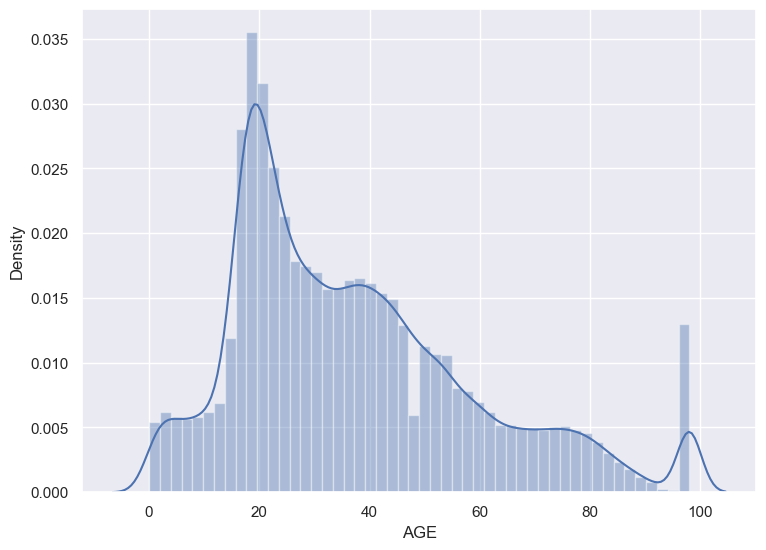

In [237]:
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.distplot(X['AGE'], bins=50)
plt.show()

In [270]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

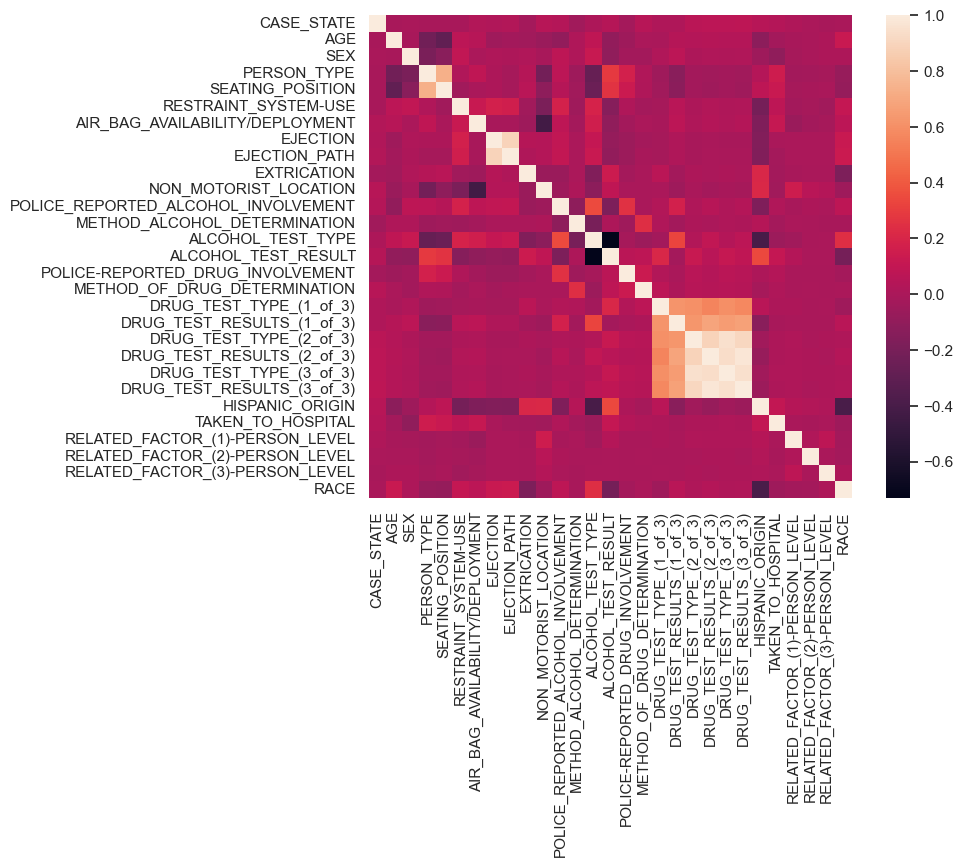

In [274]:
corr = pd.DataFrame(X_test).corr()
sns.heatmap(corr, square = True)

In [ ]:
features = ['AGE','SEX',
            'PERSON_TYPE',
            'SEATING_POSITION',
  'RESTRAINT_SYSTEM-USE',
 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
 'EJECTION',
 'EJECTION_PATH',
 'EXTRICATION',
 'NON_MOTORIST_LOCATION',
 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'METHOD_ALCOHOL_DETERMINATION',
 'ALCOHOL_TEST_TYPE',
 'ALCOHOL_TEST_RESULT',
]

In [ ]:
X = data[features]
y = data.INJURY_SEVERITY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
X_train[features].head(3)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
30673,10,27,1,1,3,11,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
88050,43,48,1,1,3,5,9,0,0,1,...,0,2,0,8,0,27,29,19,15,1
51668,23,19,1,6,16,11,4,3,9,2,...,0,2,0,6,2,27,29,19,11,5


In [240]:
y_test.head(5).values


array([4, 1, 1, 4, 5])

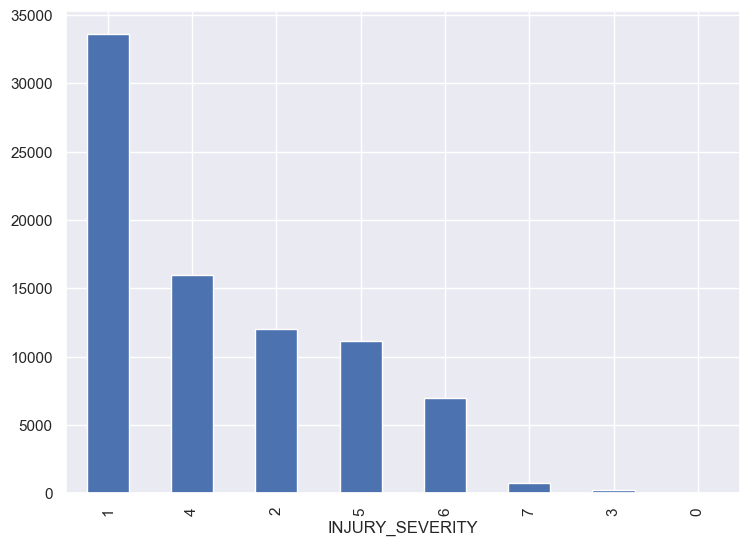

In [241]:
# Distribution of INJURY_SEVERITY
y_train.value_counts()[0:30].plot(kind='bar')
plt.show()

In [271]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=64)
]
best_classifer = classifiers[0]
prev_accuracy = -1

for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    vmae = mean_absolute_error(y_pred,y_test)
    accuracy = accuracy_score(y_test, y_pred)
    if(accuracy > prev_accuracy):
        prev_accuracy = accuracy
        best_classifer = classifier
    # Print the accuracy for each classifier
    print(f"{classifier.__class__.__name__} Accuracy: {accuracy:.4f} Mean_Error: {vmae: .4f}")

print(best_classifer.__class__.__name__)

RandomForestClassifier Accuracy: 0.7189 Mean_Error:  0.7039
KNeighborsClassifier Accuracy: 0.5995 Mean_Error:  0.9355
DecisionTreeClassifier Accuracy: 0.6952 Mean_Error:  0.7609
RandomForestClassifier


In [243]:
pred_proba = best_classifer.predict_proba(X_test)[:, 1]
print(pred_proba)
# Set a threshold (you need to choose an appropriate threshold based on your problem)
threshold = 0.72

# Convert probabilities to binary predictions based on the threshold
pred_binary = (pred_proba > threshold).astype(int)

# Calculate accuracy using the adjusted predictions
acc = accuracy_score(y_test, pred_binary)

print(f'Accuracy with threshold {threshold}: {acc}')

[0. 1. 1. ... 0. 1. 0.]
Accuracy with threshold 0.72: 0.41967911260770524


In [272]:
#Use of Smote to get prediction 
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      3659
           2       0.53      0.55      0.54      2378
           3       0.23      0.32      0.27        34
           4       0.87      0.87      0.87      3416
           5       0.46      0.44      0.45      2447
           6       0.27      0.26      0.27      1438

    accuracy                           0.71     13374
   macro avg       0.48      0.49      0.49     13374
weighted avg       0.70      0.71      0.70     13374



In [245]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Lasso logistic regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.69%


In [246]:
# from sklearn.svm import SVC
# classifier = SVC()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [247]:
# Make validation predictions and calculate mean absolute error
print(best_classifer.__class__.__name__)
val_predictions = best_classifer.predict(X_test)
val_mae = mean_absolute_error(val_predictions, y_test)
print("Validation MAE: {:,.0f}".format(val_mae))

DecisionTreeClassifier
Validation MAE: 2


c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [248]:
predictions = best_classifer.predict(X_test)
predictions

c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0])

In [249]:
from sklearn.metrics import accuracy_score

rf_score = accuracy_score(y_test, predictions)
rf_score*100

0.009903931860948796

In [250]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
   
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Use grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 99.86%


In [251]:
X_test.shape

(20194, 30)

<Axes: >

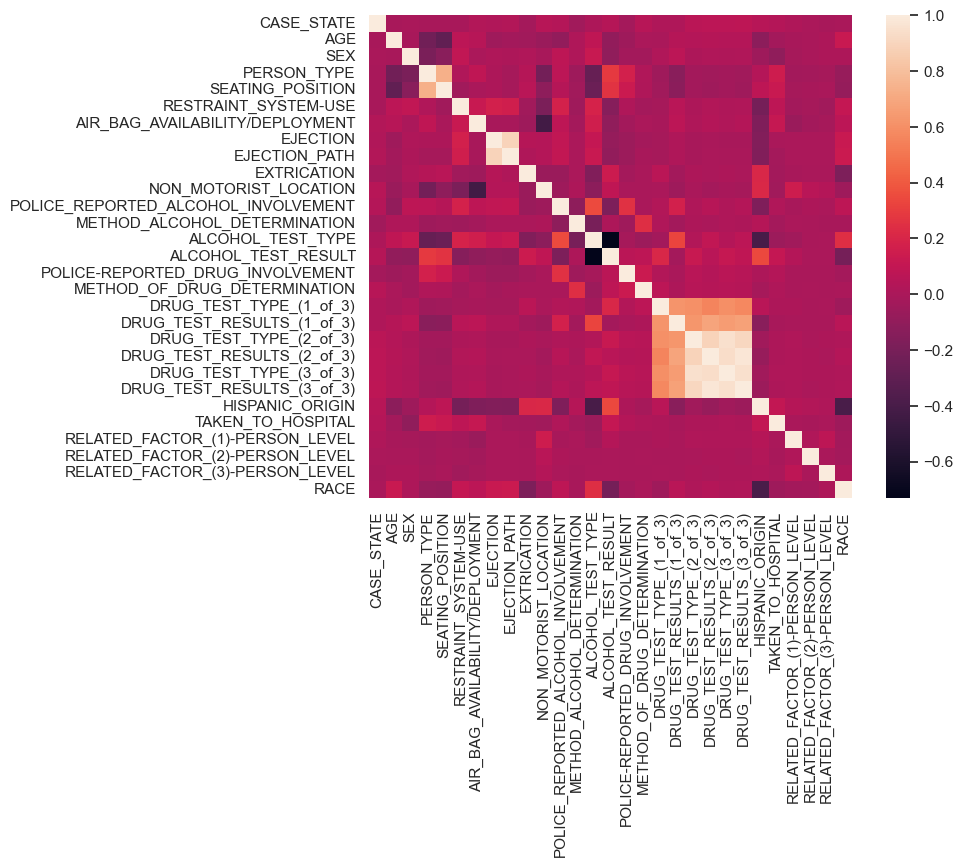

<Axes: >

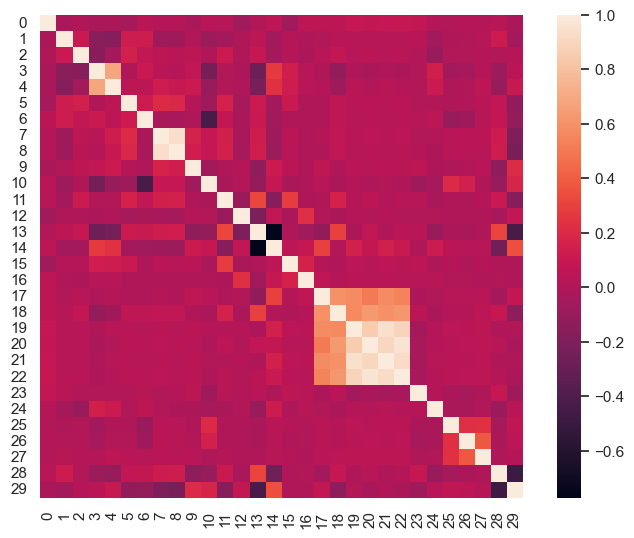

In [253]:
corr = pd.DataFrame(X_test).corr()
sns.heatmap(corr, square = True)

In [254]:
train_outcome = pd.crosstab(index=y_pred,  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
row_0,
0,2
1,8473
2,3061
3,68
4,3989
5,2753
6,1684
7,164


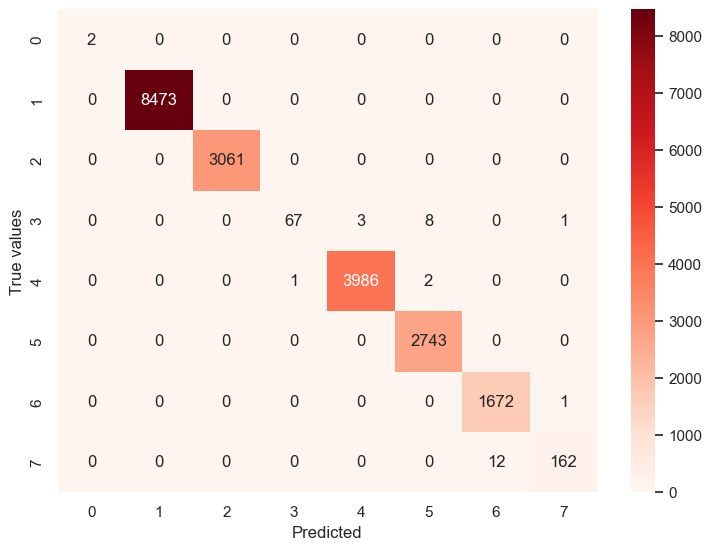

In [255]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.show()

In [256]:
X_test

array([[-0.94732384,  0.17779976,  0.63354536, ..., -0.00929337,
        -0.5103669 ,  0.65660371],
       [-0.22497675, -0.86579427,  0.63354536, ..., -0.00929337,
         1.41844289, -0.96187105],
       [ 1.48238912,  0.35929437,  0.63354536, ..., -0.00929337,
         0.77550629, -0.96187105],
       ...,
       [-0.75032009, -0.91116793,  0.63354536, ..., -0.00929337,
        -0.5103669 , -0.42237947],
       [ 0.10336284,  0.0416788 , -1.37058422, ..., -0.00929337,
         1.41844289, -0.96187105],
       [ 0.56303827,  0.81303091, -1.37058422, ..., -0.00929337,
        -0.5103669 ,  0.11711212]])

In [257]:
predictions = y_pred

In [258]:
submission = pd.DataFrame({'AGE':X_test['AGE'],'SEX':X_test['SEX'],'INJURY_SEVERITY':predictions})
submission.head()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
for column in ['INJURY_SEVERITY']:
    submission[column] = le.inverse_transform(submission[column])


In [ ]:
for df in [submission]:
     df['SEX']=df['SEX'].map({1:'Male',0:'Female'})

In [ ]:

filename = 'Fatality Analysis Reporting System Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Fatality Analysis Reporting System Predictions.csv


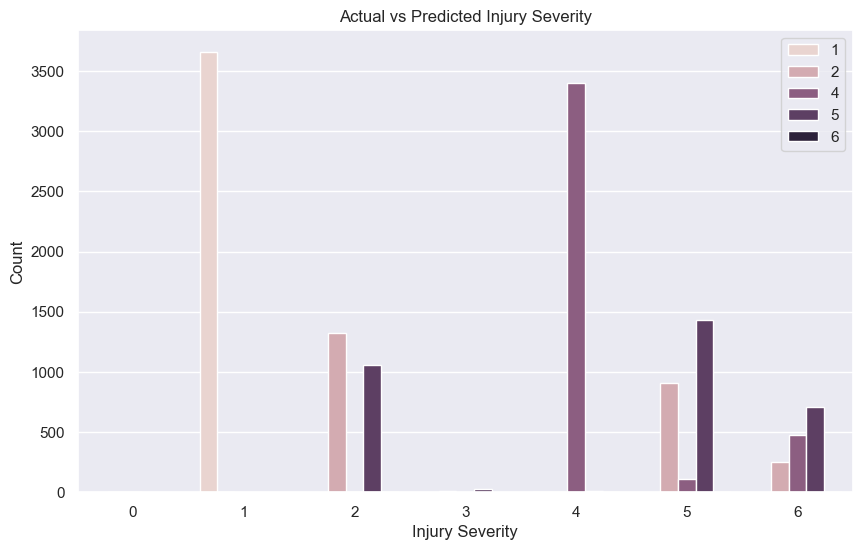

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of actual vs predicted severity
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, hue=predictions)
plt.title('Actual vs Predicted Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.show()